# amount_cat_plot

In [302]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data_csv/data.csv')
df

In [ ]:
df1 = df.drop('date', axis=1)
df1 = df1.drop('note', axis=1)
df1 = df1.drop('total_amount', axis=1)
df1 = df1.drop(0, axis=0)
df1

In [ ]:
in_a = []
out_a = []

for _, val in enumerate(df['amount']):

    if val >= 0:
        in_a.append(val)

    elif val < 0:
        out_a.append(val)

print(in_a, '\n', out_a)

In [306]:
def amount_separator(li):
    # thresholds = [2000, 5000, 10000, 30000, 50000, 100000, 200000, 500000, float('inf')]
    thresholds = [300, 500, 700, 900, 1100, 1300, 1500, 1700, 2000]
    ret_summed_li = []
    ret_li = [[] for _ in thresholds]
    
    for val in li:
        val = abs(val)
        for i, threshold in enumerate(thresholds):
            if val <= threshold:
                ret_li[i].append(val)
                break

    for val in ret_li:
        ret_summed_li.append(int(sum(val)))

    return ret_summed_li


In [ ]:
amount_separator(out_a)

In [ ]:
import numpy as np

xlist = ['-2000', '-5000', '-10000', '-30000', '-50000', '-100000', '-200000', '-500000', '500000-']
ylist = amount_separator(out_a)  # Replace with your actual data
ylist1 = amount_separator(in_a)  # Replace with your actual data

print(ylist1)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Set the background color of the entire figure
fig.patch.set_facecolor('lightgray')
ax.set_facecolor('lightgray')

# Set index for x-axis positions
index = np.arange(len(xlist))

# Set bar width
w = 0.125

# Plot the bar charts for two sets of data
bars_out = ax.bar(index - w, ylist, label='Output Amount', width=w * 2)
bars_in = ax.bar(index + w, ylist1, label='Input Amount', width=w * 2)

# Set x-axis ticks and labels
ax.set_xticks(index)  # Set tick positions (centered at index)
ax.set_xticklabels(xlist, fontsize=12, rotation=10)  # Set tick labels from xlist

# Set labels and ticks for y-axis
ax.set_xlabel('Amount Range', fontsize=14)
ax.set_ylabel('Total Amount', fontsize=14)
ax.tick_params(axis='y', labelsize=12)

# Add text on bars for both bars
for idx, bar in enumerate(bars_out):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100, ylist[idx],
            ha='center', color='black', fontsize=14)

for idx, bar in enumerate(bars_in):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100, ylist1[idx],
            ha='center', color='black', fontsize=14)

# Set the y-axis limit dynamically based on both sets of data
j, k = max(max(ylist), max(ylist1)), min(min(ylist), min(ylist1))
ax.set_ylim(k, j)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [309]:
fig.savefig('plots/bar', dpi=200, bbox_inches='tight')

# note_cat_plot

In [310]:
import matplotlib.pyplot as plots
import pandas as pd

In [ ]:
df = pd.read_csv('data_csv/data.csv')
df1 = df.drop('total_amount', axis=1)
df1 = df1.drop('date', axis=1)
df1 = df1.drop(0, axis=0)
df1

In [ ]:
cat = ['alba', 'entertainment', 'food', 'rent', 'shopping', 'transport']

for idx, val in enumerate(df1['note']):
    if not any(val == j for j in cat):
        df1.loc[idx + 1, 'note'] = 'etc'

In [ ]:
cat.append('etc')
print(cat)
cat_val = [0 for _ in range(len(cat))]
print(cat_val, len(cat_val))

for idx, val in enumerate(df1['note']):
    for cidx, cval in enumerate(cat):
        if val == cval:
            cat_val[cidx] += df1.loc[idx + 1, 'amount']


cat_val = [int(x) for x in cat_val]
cat_val

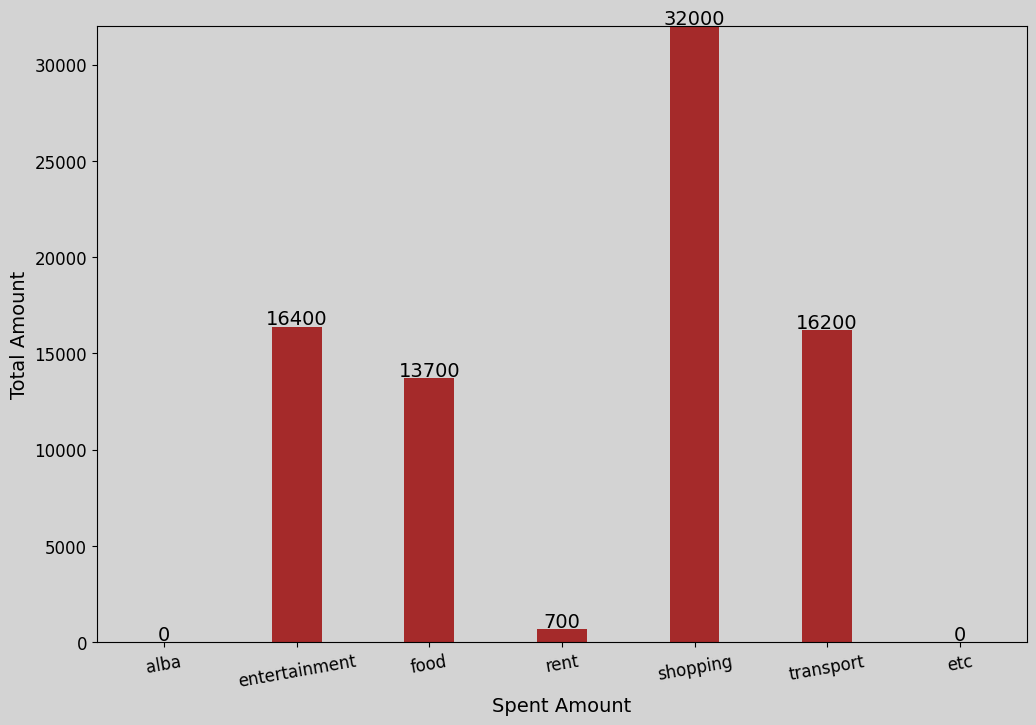

In [329]:
xlist = cat
ylist = [abs(x) if x <= 0 else 0 for x in cat_val]

fig, ax = plt.subplots(figsize=(12, 8))


fig.patch.set_facecolor('lightgray')
ax.set_facecolor('lightgray')


index = np.arange(len(xlist))


w = 0.125


bars_out = ax.bar(index, ylist, label='Spent Amount', width=w * 3,
                  color='brown')


ax.set_xticks(index)
ax.set_xticklabels(xlist, fontsize=12, rotation=10)


ax.set_xlabel('Spent Amount', fontsize=14)
ax.set_ylabel('Total Amount', fontsize=14)
ax.tick_params(axis='y', labelsize=12)


for idx, bar in enumerate(bars_out):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100, ylist[idx],
            ha='center', color='black', fontsize=14)


j, k = max(ylist), min(ylist)
ax.set_ylim(k, j)

plt.show()

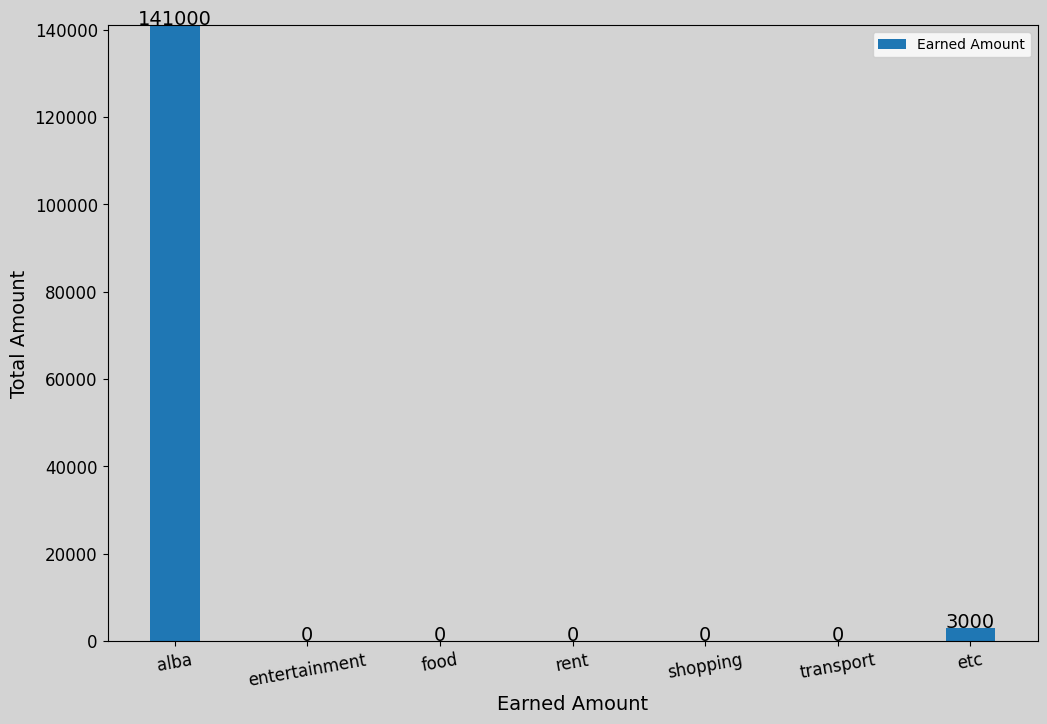

In [330]:
xlist = cat

ylist1 = [x if x > 0 else 0 for x in cat_val]

fig, ax = plt.subplots(figsize=(12, 8))


fig.patch.set_facecolor('lightgray')
ax.set_facecolor('lightgray')


index = np.arange(len(xlist))


w = 0.125



bars_in = ax.bar(index, ylist1, label='Earned Amount', width=w * 3)


ax.set_xticks(index)
ax.set_xticklabels(xlist, fontsize=12, rotation=10)


ax.set_xlabel('Earned Amount', fontsize=14)
ax.set_ylabel('Total Amount', fontsize=14)
ax.tick_params(axis='y', labelsize=12)


for idx, bar in enumerate(bars_in):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100, ylist1[idx],
            ha='center', color='black', fontsize=14)


j, k = max(ylist1), min(ylist1)
ax.set_ylim(k, j)


plt.legend()


plt.show()